# Mortality in Italy

## Introduction

In this analysis using **pdnd-nteract** we will present some data regarding the current state (updated to 2016) and evolution in recent years of causes of death in Italy, both from a national and from a provincial level.

This dataset is provided by the Italian National Institute of Statistics (ISTAT), which is the main producer of official statistics in Italy and it contains Vital statistics on causes of death: The Vital statistics system on causes of death is the main source for the evaluation of the health status of the population, and for the health programs and resources allocation.

Given the considerable size of the [complete dataset](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_CMORTE1_EV), we will use multiple subsets downloaded from the ISTAT tool.

## Let's start
We will start by importing some python libraries:


In [2]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from io import StringIO
pd.options.display.html.table_schema = True
pd.set_option('display.max_rows', None)
import os

In [8]:
plt.rcParams['figure.dpi'] = 150

We import the dataset and rename some columns for simplicity.

Let's take a look:

In [4]:
national_df = pd.read_csv(os.path.join('mortality', 'italia2016.csv'))
national_df.columns = ['causa' if x=='Causa iniziale di morte - European Short List' else 
                       'causa_cod' if x=='CAUSEMORTE_SL' else 
                       x for x in national_df.columns]
national_df.head(20)

,ITTER107,Territorio,TIPO_DATO15,Tipo dato,SEXISTAT1,Sesso,causa_cod,causa,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2016,2016,24059,NaN,NaN
1,IT,Italia,DEATH,morti,1,maschi,2_1_14,di cui tumori maligni della prostata,2016,2016,7540,NaN,NaN
2,IT,Italia,DEATH,morti,1,maschi,7,malattie del sistema circolatorio,2016,2016,96728,NaN,NaN
3,IT,Italia,DEATH,morti,1,maschi,7_1_2,du cui altre malattie ischemiche del cuore,2016,2016,21851,NaN,NaN
4,IT,Italia,DEATH,morti,1,maschi,7_4,altre malattie del sistema circolatorio,2016,2016,17799,NaN,NaN
5,IT,Italia,DEATH,morti,1,maschi,8_2,polmonite,2016,2016,5286,NaN,NaN
6,IT,Italia,DEATH,morti,1,maschi,17_1_2,di cui cadute accidentali,2016,2016,2060,NaN,NaN
7,IT,Italia,DEATH,morti,1,maschi,17_1_5,di cui altri accidenti,2016,2016,4945,NaN,NaN
8,IT,Italia,DEATH,morti,1,maschi,2_1_4,"di cui tumori maligni del colon, del retto e d...",2016,2016,10652,NaN,NaN
9,IT,Italia,DEATH,morti,1,maschi,2_1_7,di cui tumori maligni della laringe,2016,2016,1424,NaN,NaN


The dataset's `Sesso` column is divided by male, female and total (sum).

In [4]:
national_df['Sesso'].unique()

array(['maschi', 'totale', 'femmine'], dtype=object)

We can see the total number of causes of death, including macrocategories and subcategories.

In [5]:
len(national_df['causa_cod'].unique())

87

## Macro-causes of death

Here we can see a *bar chart* showing the top macro-causes of death.

In [6]:
national_total_df = national_df[national_df['Sesso'].isin(['totale']) & national_df['Territorio'].isin(['Italia'])]
national_total_df = national_total_df[~national_total_df['causa'].isin(['totale'])]
national_total_df_macro = national_total_df[~national_total_df['causa_cod'].str.contains('_')]
national_total_df_macro = national_total_df_macro[['causa','Value']]
national_total_df_macro

,causa,Value
172,malattie del sistema circolatorio,221914
174,alcune condizioni morbose che hanno origine ne...,891
176,cause esterne di traumatismo e avvelenamento,24352
177,alcune malattie infettive e parassitarie,12850
185,malattie della cute e del tessuto sottocutaneo,1214
188,malformazioni congenite ed anomalie cromosomiche,1232
190,tumori,179502
192,disturbi psichici e comportamentali,21535
193,malattie dell'apparato digerente,22643
201,malattie del sistema respiratorio,46537


This chart shows the top 15 causes broken down in more detail. They are filtered using a regular expression on the `causa` column.

In [7]:
national_total_df_detailed = national_total_df[national_total_df['causa_cod'].str.match('^\d+_\d+$')]
national_total_df_detailed = national_total_df_detailed[['causa','Value']]
national_total_df_detailed.sort_values('Value', ascending = False).head(15)

,causa,Value
179,tumori maligni,170286
255,malattie ischemiche del cuore,66868
236,malattie cerebrovascolari,56958
200,altre malattie del cuore,51275
216,altre malattie del sistema circolatorio,46813
208,malattie croniche delle basse vie respiratorie,23710
182,diabete mellito,21354
183,demenza,19875
203,accidenti,19508
194,altre malattie dell'apparato digerente,16191


### Tumors break-down

With tumors being among the most common causes of death by a considerable margin, we can plot a chart of the incidence by type and sex.

In [8]:
national_mf = national_df[~national_df['Sesso'].isin(['totale']) & national_df['Territorio'].isin(['Italia'])]
national_mf = national_mf[~national_mf['causa'].isin(['totale'])]
national_mf_tumors = national_mf[national_mf['causa'].str.contains('di cui tumori')]
national_mf_tumors = national_mf_tumors[['Sesso','causa','Value']]
national_mf_tumors = national_mf_tumors.pivot("causa", "Sesso", "Value").fillna(0)
national_mf_tumors

Sesso,femmine,maschi
causa,,
di cui tumori maligni del cervello e del sistema nervoso centrale,1838.0,2325.0
"di cui tumori maligni del colon, del retto e dell'ano",8923.0,10652.0
di cui tumori maligni del fegato e dei dotti biliari intraepatici,3274.0,6428.0
di cui tumori maligni del pancreas,6215.0,5834.0
di cui tumori maligni del rene,1295.0,2422.0
di cui tumori maligni del seno,12616.0,144.0
di cui tumori maligni dell'esofago,515.0,1417.0
di cui tumori maligni dell'ovaio,3260.0,0.0
di cui tumori maligni della cervice uterina,509.0,0.0


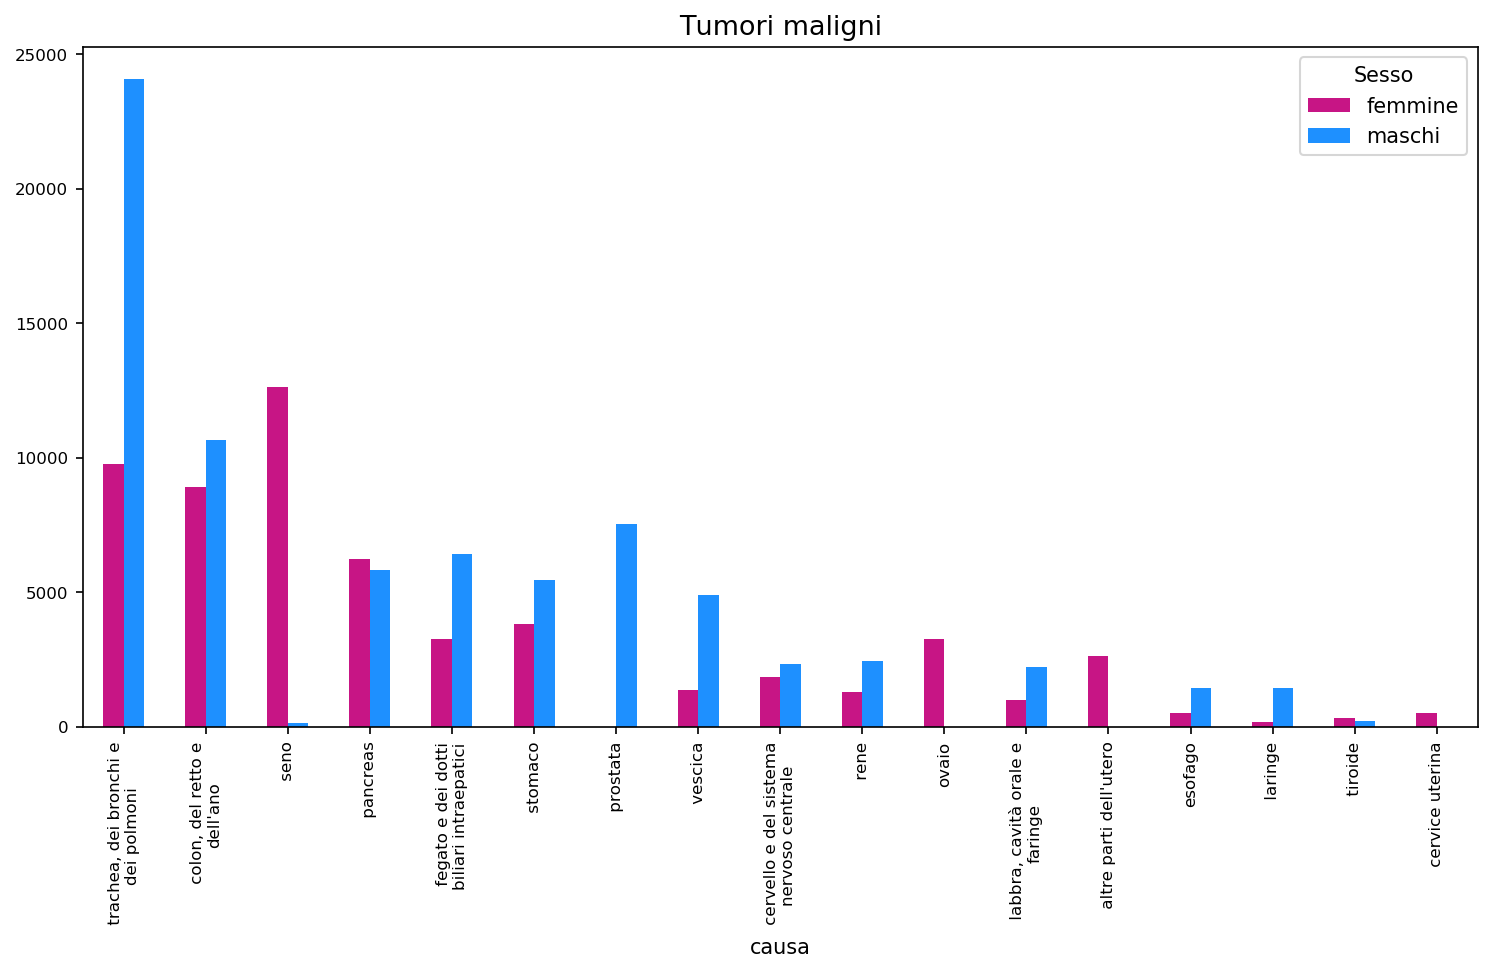

In [9]:
national_mf_tumors.index = national_mf_tumors.index.str.replace("^di cui tumori maligni (della|dello|delle|dell'|di|del)", '', regex = True)
national_mf_tumors = national_mf_tumors.assign(t = national_mf_tumors['maschi'] + national_mf_tumors['femmine']).sort_values('t', ascending = False).drop('t', axis=1)
plt.rcParams["figure.figsize"] = (12, 6)
national_mf_tumors.plot(kind='bar', color=['mediumvioletred', 'dodgerblue'])

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

from textwrap import fill
labels = [fill(l, 23) for l in national_mf_tumors.index]

plt.gca().set_xticklabels(labels)
plt.title('Tumori maligni',fontsize=13)


plt.show()

## Thematic maps by cause of death

We prepare the dataset to be used in choropleth visualizations.

Since the dataset aggregates provinces and macro-areas, detailed categories and macro-categories of causes of death, it needs to be streamlined.

We also need to add information about the population of every province, to later obtain the incidence for every cause of death.

In [10]:
national_df_prov = national_df[~national_df['Territorio'].isin(['Italia', 'Nord-ovest', 'Nord-est', 'Centro', 'Sud'])]
national_df_prov = national_df_prov[national_df_prov['ITTER107'].str.len() == 5]
national_df_prov = national_df_prov[national_df_prov['Sesso'].isin(['totale'])]
national_df_prov = national_df_prov[~national_df_prov['causa_cod'].str.contains('_')]

In [11]:
population_prov = pd.read_csv(os.path.join('mortality', 'popolazione_prov.csv'))
population_prov.rename({'Value': 'popolazione'}, axis=1, inplace=True)
population_prov = population_prov[['ITTER107', 'popolazione']]

In [12]:
national_prov_pop = national_df_prov.merge(population_prov, on='ITTER107')
national_prov_pop['incidenza'] = national_prov_pop['Value'] / national_prov_pop['popolazione']

We now import the map file.

In [3]:
map_pr = gpd.read_file(os.path.join('italy_maps', 'CMProv2016_ED50', 'CMprov2016_ED50.shp'))
map_pr.columns = ['desc_pr' if x=='DEN_CMPRO' else x for x in map_pr.columns]

We compare the two dataframes to point out naming inconsistencies.

In [14]:
national_df_prov[~national_df_prov['Territorio'].isin(map_pr['desc_pr'])]['Territorio'].unique()

array(["Valle d'Aosta / Vallée d'Aoste", 'Bolzano / Bozen',
       'Forlì-Cesena', 'Massa-Carrara'], dtype=object)

In [15]:
list(map_pr[~map_pr['desc_pr'].isin(national_df_prov['Territorio'])]['desc_pr'])

['Aosta', 'Bolzano', "Forli'-Cesena", 'Massa Carrara']

In [4]:
map_pr['desc_pr'] = map_pr['desc_pr'].replace({"Aosta": "Valle d'Aosta / Vallée d'Aoste", 'Bolzano': 'Bolzano / Bozen', "Forli'-Cesena":'Forlì-Cesena', 'Massa Carrara':'Massa-Carrara'})

### Examples of thematic maps

In [17]:
prov_sis_circolatorio = national_prov_pop[national_prov_pop['causa'].isin(['malattie del sistema circolatorio'])]
merged_prov_sis_circolatorio = pd.merge(map_pr, prov_sis_circolatorio, left_on='desc_pr', right_on='Territorio')

prov_tumori = national_prov_pop[national_prov_pop['causa'].isin(['tumori'])]
merged_prov_tumori = pd.merge(map_pr, prov_tumori, left_on='desc_pr', right_on='Territorio')

prov_sis_nervoso = national_prov_pop[national_prov_pop['causa'].isin(['malattie del sistema nervoso e degli organi di senso'])]
merged_prov_sis_nervoso = pd.merge(map_pr, prov_sis_nervoso, left_on='desc_pr', right_on='Territorio')

Note that in these maps **blue** indicates an incidence lower than the mean, while **red** indicates an incidence higher than the mean.

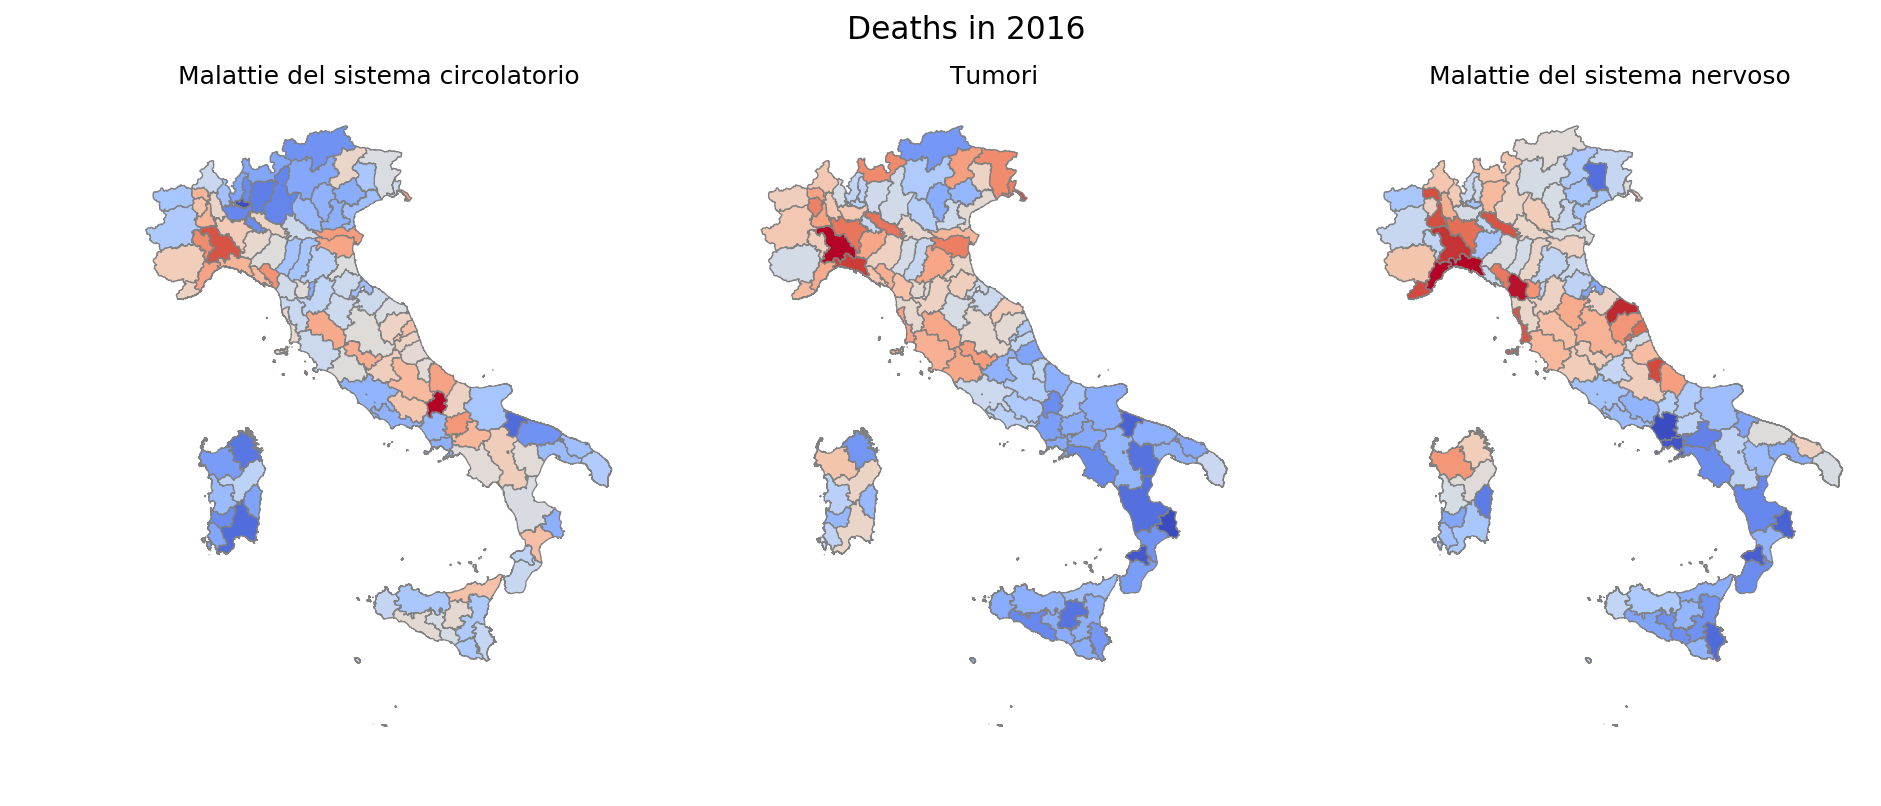

In [18]:
variable = 'incidenza'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.suptitle('Deaths in 2016',fontsize=15, y=0.96)

ax1.set_title('Malattie del sistema circolatorio')
ax2.set_title('Tumori')
ax3.set_title('Malattie del sistema nervoso')


merged_prov_sis_circolatorio.plot(column=variable, cmap='coolwarm', linewidth=0.6, ax=ax1, edgecolor='#808080')
merged_prov_tumori.plot(column=variable, cmap='coolwarm', linewidth=0.6, ax=ax2, edgecolor='#808080')
merged_prov_sis_nervoso.plot(column=variable, cmap='coolwarm', linewidth=0.6, ax=ax3, edgecolor='#808080')

### 

## Evolution of causes of death, 2003-2016

Now we present some example *line charts* showing the trend for three causes of death, specifically AIDS, lung tumors and heart attacks, for the period 2003-2016.

First, we filter and prepare the corresponding datasets.

In [19]:
trend_df = pd.read_csv(os.path.join('mortality', 'italia_aids_polmoni_infarti_2003_2016.csv'))
trend_df.columns = ['causa' if x=='Causa iniziale di morte - European Short List' else 
                    'Anno' if x=='TIME' else
                    x for x in trend_df.columns]
trend_df = trend_df[['Sesso', 'causa', 'Anno', 'Value']]

trend_AIDS = trend_df[trend_df['causa'] == 'aids (malattia da hiv)']
trend_tumori_polmone = trend_df[trend_df['causa'] == 'di cui tumori maligni della trachea, dei bronchi e dei polmoni']
trend_infarti = trend_df[trend_df['causa'] == 'di cui infarto miocardico acuto']

We proceed by plotting the three datasets.

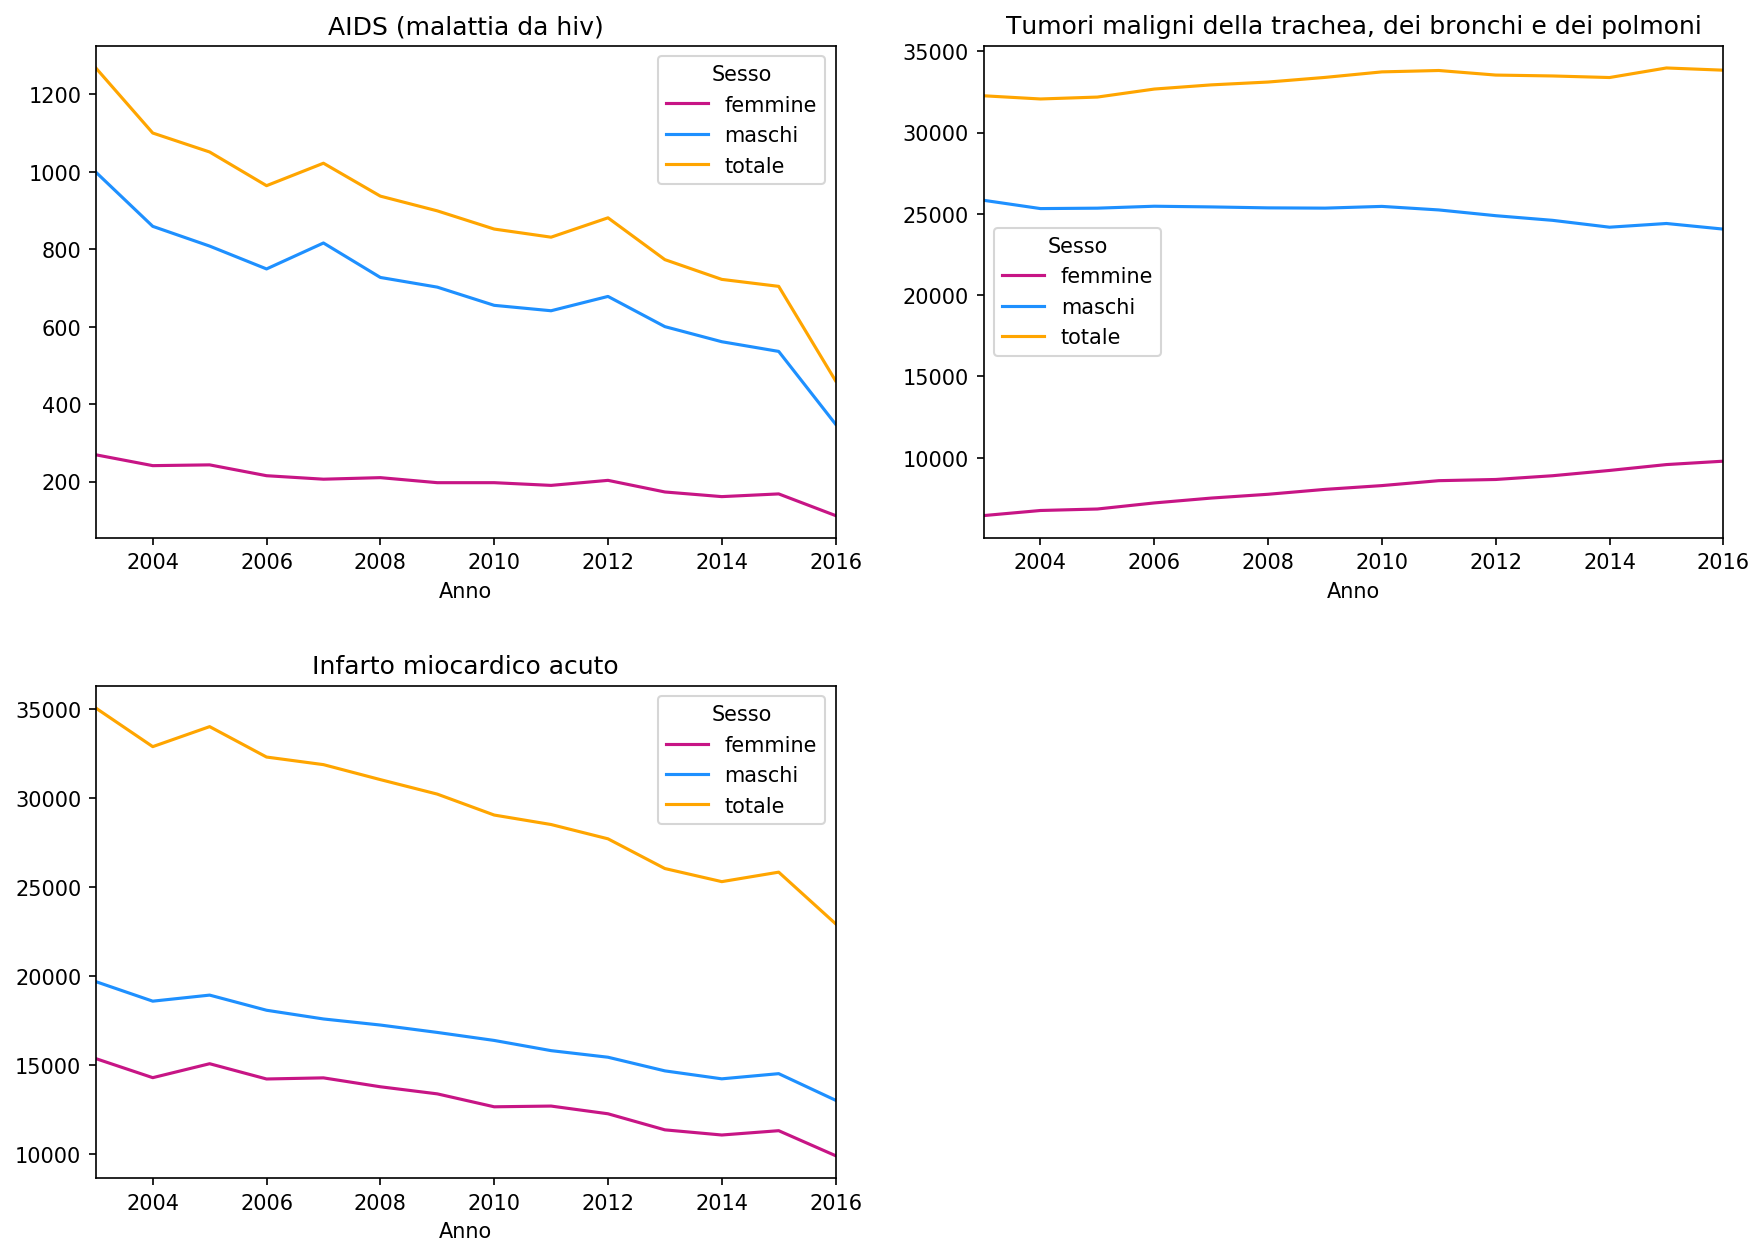

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].set_title('AIDS (malattia da hiv)')
axs[0, 1].set_title('Tumori maligni della trachea, dei bronchi e dei polmoni')
axs[1, 0].set_title('Infarto miocardico acuto')
axs[1, 1].axis('off')

fig.subplots_adjust(hspace=0.3)

trend_AIDS_p = trend_AIDS.pivot("Anno", "Sesso", "Value").fillna(0)
trend_tumori_polmone_p = trend_tumori_polmone.pivot("Anno", "Sesso", "Value").fillna(0)
trend_infarti_p = trend_infarti.pivot("Anno", "Sesso", "Value").fillna(0)

trend_AIDS_p.plot(ax=axs[0, 0], color=['mediumvioletred', 'dodgerblue', 'orange'])
trend_tumori_polmone_p.plot(ax=axs[0, 1], color=['mediumvioletred', 'dodgerblue', 'orange'])
trend_infarti_p.plot(ax=axs[1, 0], color=['mediumvioletred', 'dodgerblue', 'orange'])

By using this kind of visualization, it's easy to grasp trends such as the significant decrease in deaths by AIDS or heart attacks in recent years.

In [5]:
national_mortality_ts = pd.read_csv(os.path.join('mortality', 'italia_morte_timeseries.csv'))
national_mortality_ts.columns = ['causa' if x=='Causa iniziale di morte - European Short List' else 
                       'causa_cod' if x=='CAUSEMORTE_SL' else 
                       x for x in national_mortality_ts.columns]
national_mortality_ts.head(20)

,ITTER107,Territorio,TIPO_DATO15,Tipo dato,SEXISTAT1,Sesso,causa_cod,causa,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2003,2003,25833,NaN,NaN
1,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2004,2004,25322,NaN,NaN
2,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2005,2005,25348,NaN,NaN
3,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2006,2006,25467,NaN,NaN
4,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2007,2007,25425,NaN,NaN
5,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2008,2008,25366,NaN,NaN
6,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2009,2009,25350,NaN,NaN
7,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2010,2010,25457,NaN,NaN
8,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2011,2011,25239,NaN,NaN
9,IT,Italia,DEATH,morti,1,maschi,2_1_8,"di cui tumori maligni della trachea, dei bronc...",2012,2012,24885,NaN,NaN


In [6]:
nn = national_mortality_ts.loc[(national_mortality_ts['causa'] == 'tumori') & (national_mortality_ts['Territorio'] == 'Italia') & (national_mortality_ts['Sesso'] == 'totale')]
nn

,ITTER107,Territorio,TIPO_DATO15,Tipo dato,SEXISTAT1,Sesso,causa_cod,causa,TIME,Seleziona periodo,Value,Flag Codes,Flags
2656,IT,Italia,DEATH,morti,9,totale,2,tumori,2003,2003,167144,NaN,NaN
2657,IT,Italia,DEATH,morti,9,totale,2,tumori,2004,2004,166439,NaN,NaN
2658,IT,Italia,DEATH,morti,9,totale,2,tumori,2005,2005,166546,NaN,NaN
2659,IT,Italia,DEATH,morti,9,totale,2,tumori,2006,2006,168664,NaN,NaN
2660,IT,Italia,DEATH,morti,9,totale,2,tumori,2007,2007,171625,NaN,NaN
2661,IT,Italia,DEATH,morti,9,totale,2,tumori,2008,2008,172783,NaN,NaN
2662,IT,Italia,DEATH,morti,9,totale,2,tumori,2009,2009,174678,NaN,NaN
2663,IT,Italia,DEATH,morti,9,totale,2,tumori,2010,2010,175040,NaN,NaN
2664,IT,Italia,DEATH,morti,9,totale,2,tumori,2011,2011,175966,NaN,NaN
2665,IT,Italia,DEATH,morti,9,totale,2,tumori,2012,2012,177351,NaN,NaN


In [7]:
nn = national_mortality_ts.loc[(national_mortality_ts['causa'] == 'tumori') & (national_mortality_ts['Territorio'] == 'Italia')]
pivot = nn.pivot(index='TIME',columns='Sesso')['Value']
pivot

Sesso,femmine,maschi,totale
TIME,,,
2003,71017,96127,167144
2004,70996,95443,166439
2005,71590,94956,166546
2006,72248,96416,168664
2007,74270,97355,171625
2008,75010,97773,172783
2009,76112,98566,174678
2010,76195,98845,175040
2011,76915,99051,175966


In [9]:
pct = pivot.pct_change()
pct

Sesso,femmine,maschi,totale
TIME,,,
2003,NaN,NaN,NaN
2004,-0.000296,-0.007116,-0.004218
2005,0.008367,-0.005103,0.000643
2006,0.009191,0.015376,0.012717
2007,0.027987,0.009739,0.017556
2008,0.009964,0.004294,0.006747
2009,0.014691,0.008111,0.010968
2010,0.001090,0.002831,0.002072
2011,0.009449,0.002084,0.005290


In [10]:
pct.cumsum()

Sesso,femmine,maschi,totale
TIME,,,
2003,NaN,NaN,NaN
2004,-0.000296,-0.007116,-0.004218
2005,0.008071,-0.012218,-0.003575
2006,0.017262,0.003157,0.009142
2007,0.045249,0.012896,0.026698
2008,0.055213,0.017190,0.033445
2009,0.069904,0.025301,0.044413
2010,0.070995,0.028131,0.046485
2011,0.080444,0.030215,0.051775


In [13]:
nnt = national_mortality_ts.loc[(national_mortality_ts['causa'] == 'tumori') & (national_mortality_ts['ITTER107'] != 'ITC2') & (national_mortality_ts['Sesso'] == 'totale')].set_index("TIME") #.head(200)
nnt.reset_index("TIME", inplace = True)
#nnt
pivot_territorio = nnt.pivot(index='TIME',columns='Territorio')['Value']
pivot_territorio #.head(20)

Territorio,Abruzzo,Agrigento,Alessandria,Ancona,Arezzo,Ascoli Piceno,Asti,Avellino,Bari,Barletta-Andria-Trani,...,Valle d'Aosta / Vallée d'Aoste,Varese,Veneto,Venezia,Verbano-Cusio-Ossola,Vercelli,Verona,Vibo Valentia,Vicenza,Viterbo
TIME,,,,,,,,,,,,,,,,,,,,,
2003,3371.0,983.0,1849.0,1610.0,1116.0,1033.0,638.0,1012.0,3452.0,NaN,...,345.0,2632.0,13514.0,2523.0,597.0,613.0,2461.0,322.0,2092.0,1143.0
2004,3423.0,949.0,1723.0,1558.0,1064.0,1045.0,638.0,953.0,3480.0,NaN,...,368.0,2423.0,13538.0,2499.0,564.0,623.0,2429.0,284.0,2171.0,1167.0
2005,3455.0,963.0,1664.0,1455.0,1109.0,1027.0,674.0,979.0,3395.0,NaN,...,392.0,2435.0,13586.0,2490.0,593.0,590.0,2475.0,313.0,2208.0,1161.0
2006,3313.0,1013.0,1754.0,1543.0,1084.0,994.0,628.0,989.0,3626.0,NaN,...,385.0,2589.0,13705.0,2499.0,562.0,603.0,2512.0,281.0,2160.0,1197.0
2007,3392.0,1050.0,1826.0,1555.0,1042.0,1046.0,687.0,998.0,3526.0,NaN,...,392.0,2656.0,13963.0,2556.0,556.0,574.0,2520.0,284.0,2239.0,1143.0
2008,3426.0,1027.0,1758.0,1541.0,1036.0,1107.0,683.0,992.0,3657.0,NaN,...,374.0,2693.0,14035.0,2581.0,567.0,658.0,2525.0,307.0,2183.0,1196.0
2009,3430.0,1060.0,1865.0,1638.0,1123.0,1067.0,633.0,991.0,3656.0,NaN,...,356.0,2697.0,14120.0,2594.0,555.0,628.0,2600.0,338.0,2248.0,1200.0
2010,3443.0,1087.0,1824.0,1502.0,1048.0,618.0,738.0,1072.0,3037.0,785.0,...,367.0,2736.0,13908.0,2583.0,546.0,628.0,2561.0,320.0,2189.0,1162.0
2011,3531.0,1106.0,1730.0,1505.0,1025.0,645.0,716.0,1054.0,3051.0,772.0,...,413.0,2710.0,14243.0,2605.0,573.0,652.0,2573.0,312.0,2252.0,1116.0


In [14]:
pct_territorio = pivot_territorio.pct_change()
pct_territorio.iloc[:,0:15]

Territorio,Abruzzo,Agrigento,Alessandria,Ancona,Arezzo,Ascoli Piceno,Asti,Avellino,Bari,Barletta-Andria-Trani,Basilicata,Belluno,Benevento,Bergamo,Biella
TIME,,,,,,,,,,,,,,,
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.015426,-0.034588,-0.068145,-0.032298,-0.046595,0.011617,0.000000,-0.058300,0.008111,NaN,0.099688,0.042636,-0.004329,-0.069557,0.027439
2005,0.009349,0.014752,-0.034243,-0.066110,0.042293,-0.017225,0.056426,0.027282,-0.024425,NaN,0.014873,-0.092937,0.075362,0.018428,0.020772
2006,-0.041100,0.051921,0.054087,0.060481,-0.022543,-0.032132,-0.068249,0.010215,0.068041,NaN,-0.008374,0.069672,-0.074124,0.027654,0.029070
2007,0.023845,0.036525,0.041049,0.007777,-0.038745,0.052314,0.093949,0.009100,-0.027579,NaN,0.000000,-0.007663,0.018923,0.045183,-0.077684
2008,0.010024,-0.021905,-0.037240,-0.009003,-0.005758,0.058317,-0.005822,-0.006012,0.037153,NaN,0.001407,0.056628,0.032857,0.024476,0.007657
2009,0.001168,0.032132,0.060865,0.062946,0.083977,-0.036134,-0.073206,-0.001008,-0.000273,NaN,0.002108,-0.091352,-0.001383,-0.025132,0.095745
2010,0.003790,0.025472,-0.021984,-0.083028,-0.066785,-0.420806,0.165877,0.081736,-0.169311,NaN,0.016129,-0.033512,0.026316,0.011139,-0.138696
2011,0.025559,0.017479,-0.051535,0.001997,-0.021947,0.043689,-0.029810,-0.016791,0.004610,-0.016561,0.011732,0.018031,0.045884,-0.008813,0.080515


In [15]:
pct_territorio_cum_sum = pct_territorio.cumsum()
pct_territorio_cum_sum.iloc[:,0:15]

Territorio,Abruzzo,Agrigento,Alessandria,Ancona,Arezzo,Ascoli Piceno,Asti,Avellino,Bari,Barletta-Andria-Trani,Basilicata,Belluno,Benevento,Bergamo,Biella
TIME,,,,,,,,,,,,,,,
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.015426,-0.034588,-0.068145,-0.032298,-0.046595,0.011617,0.000000,-0.058300,0.008111,NaN,0.099688,0.042636,-0.004329,-0.069557,0.027439
2005,0.024774,-0.019836,-0.102388,-0.098409,-0.004302,-0.005608,0.056426,-0.031018,-0.016314,NaN,0.114561,-0.050301,0.071033,-0.051128,0.048211
2006,-0.016326,0.032085,-0.048301,-0.037927,-0.026845,-0.037741,-0.011823,-0.020804,0.051727,NaN,0.106187,0.019371,-0.003091,-0.023474,0.077280
2007,0.007520,0.068611,-0.007252,-0.030150,-0.065590,0.014573,0.082126,-0.011704,0.024149,NaN,0.106187,0.011708,0.015832,0.021709,-0.000403
2008,0.017543,0.046706,-0.044492,-0.039154,-0.071348,0.072891,0.076304,-0.017716,0.061301,NaN,0.107594,0.068336,0.048689,0.046184,0.007254
2009,0.018711,0.078838,0.016373,0.023793,0.012629,0.036757,0.003097,-0.018724,0.061028,NaN,0.109703,-0.023016,0.047306,0.021052,0.102998
2010,0.022501,0.104310,-0.005611,-0.059236,-0.054157,-0.384049,0.168974,0.063012,-0.108283,NaN,0.125832,-0.056528,0.073622,0.032192,-0.035698
2011,0.048060,0.121789,-0.057146,-0.057238,-0.076103,-0.340360,0.139164,0.046221,-0.103673,-0.016561,0.137564,-0.038497,0.119506,0.023379,0.044817


We can plot a map showing the difference in the incidence of tumors, at a provincial level, between years 2003 and 2016.

In [16]:
pct_diff = pct_territorio_cum_sum.tail(1)
pct_diff = pct_diff.transpose()
pct_diff.rename(columns={2016:'diff_03_16'}, inplace=True)
pct_diff

TIME,diff_03_16
Territorio,
Abruzzo,0.060391
Agrigento,0.072551
Alessandria,-0.034867
Ancona,-0.017403
Arezzo,-0.050592
Ascoli Piceno,-0.394017
Asti,0.136473
Avellino,0.079425
Bari,-0.035529


In [17]:
merged_pct_diff = pd.merge(map_pr, pct_diff, left_on='desc_pr', right_on='Territorio')

A province colored in **violet** has experienced an increase in incidence, while **green** indicates a decrease.

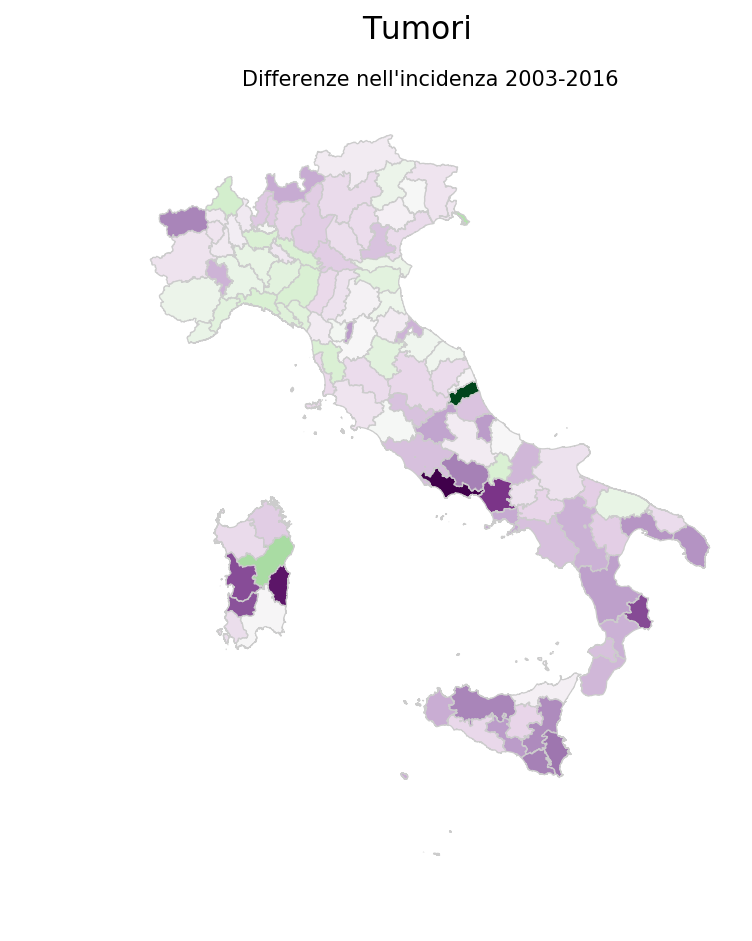

In [18]:
variable = 'diff_03_16'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')

plt.suptitle('Tumori',fontsize=15, y=0.96)
plt.title("Differenze nell'incidenza 2003-2016",fontsize=10)


merged_pct_diff.plot(column=variable, cmap='PRGn_r', linewidth=0.6, ax=ax, edgecolor='0.8')

In [19]:
pct_territorio_cum_sum.sort_values(by=2016, ascending=False, axis=1).iloc[:,0:15]

Territorio,Latina,Ogliastra,Caserta,Crotone,Oristano,Medio Campidano,Sardegna,Siracusa,Frosinone,Ragusa,Palermo,Valle d'Aosta / Vallée d'Aoste,Catania,Lecce,Taranto
TIME,,,,,,,,,,,,,,,
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,-0.013369,NaN,0.042403,0.106383,0.016575,NaN,0.042254,0.078849,0.032086,0.073463,0.033172,0.066667,-0.008857,-0.003041,0.013386
2005,0.061608,NaN,0.068392,-0.018617,-0.005165,NaN,0.049252,0.111331,-0.028363,0.037150,0.034615,0.131884,0.001781,0.020853,0.004839
2006,0.092701,NaN,0.085462,0.003361,0.142058,NaN,0.065786,0.095601,0.046085,0.071933,0.073159,0.114027,0.071676,0.025322,0.039322
2007,0.056026,0.327434,0.132024,0.085798,0.110581,-0.125000,0.075923,0.128706,0.099977,0.083138,0.130738,0.132209,0.093715,0.073765,0.063564
2008,0.162625,0.200767,0.151683,0.085798,0.200581,0.134259,0.095526,0.044728,0.067510,0.102528,0.145169,0.086290,0.096795,0.102525,0.102026
2009,0.119812,0.132065,0.147624,0.214937,0.191406,0.256108,0.131919,0.102629,0.101906,0.094376,0.151636,0.038162,0.110231,0.075944,0.068550
2010,0.298725,0.222229,0.182774,0.223735,0.189092,0.136258,0.140091,0.120873,0.148134,0.084787,0.179583,0.069061,0.110231,0.134795,0.109080
2011,0.295338,0.199672,0.184250,0.215014,0.254057,0.093705,0.163092,0.209339,0.138057,0.129047,0.136458,0.194401,0.121594,0.164586,0.201857


In [23]:
pct_territorio_cum_sum.sort_values(by=2016, ascending=True, axis=1).iloc[:,0:15]

Territorio,Ascoli Piceno,Nuoro,Trieste,Verbano-Cusio-Ossola,Genova,Isernia,Liguria,Parma,Pisa,Milano,Cremona,La Spezia,Massa-Carrara,Savona,Piacenza
TIME,,,,,,,,,,,,,,,
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.011617,0.029968,-0.017824,-0.055276,-0.043218,-0.004348,-0.052491,-0.003802,-0.064182,0.015753,-0.005438,-0.025157,-0.039084,-0.015814,0.017642
2005,-0.005608,0.045282,-0.058893,-0.003858,-0.022196,0.091722,-0.040513,-0.067416,-0.046483,0.018854,-0.029362,-0.001931,-0.067134,-0.028101,-0.068125
2006,-0.037741,-0.266935,-0.047937,-0.056135,-0.019691,0.099690,-0.024238,-0.044318,-0.095034,0.012169,0.011955,-0.052373,0.002130,-0.019489,-0.050161
2007,0.014573,-0.273514,-0.058775,-0.066811,-0.006924,0.072022,-0.040575,0.006811,-0.051622,0.050449,-0.019653,-0.076277,-0.043754,-0.092544,-0.068788
2008,0.072891,-0.308834,-0.004990,-0.047026,-0.009391,0.137063,-0.023637,0.006179,-0.050162,0.041374,-0.017569,-0.092604,-0.028195,-0.000425,-0.055801
2009,0.036757,-0.334005,-0.037126,-0.068191,-0.023951,0.034009,-0.022667,-0.033011,-0.066197,0.076127,-0.006481,-0.012382,0.037264,0.049247,-0.051856
2010,-0.384049,-0.268278,-0.045915,-0.084407,-0.019212,0.080818,-0.037530,-0.045511,-0.098049,-0.128946,0.001058,-0.041832,-0.055546,-0.083789,-0.013546
2011,-0.340360,-0.169159,-0.087294,-0.034956,-0.011998,0.040168,-0.016211,-0.018863,-0.021538,-0.140975,-0.087377,-0.002254,-0.051223,-0.040535,-0.061796
